# Logistic Regression
Logistic Regression is a supervised machine learning algorithm used for classification problems, especially binary classification (where the output is either 0 or 1).

Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts probabilities using the sigmoid function.

If probability ≥ 0.5 → Class 1 *I f probability < 0.5 → Class 0

Examples:

-Predict if a student passes or fails

-Predict if a customer will buy or not

-Binary Classification Concepts

-Binary classification means predicting one of two possible outcomes.

Examples:

0 = No Disease, 1 = Disease

0 = Not Survived, 1 = Survived

0 = Negative, 1 = Positive

Binary classification models output a probability between 0 and 1. Based on a threshold (usually 0.5), the model assigns a class.

# Confusion Matrix
A Confusion Matrix is a 2×2 table used to evaluate classification models.

                Predicted Positive	    Predicted Negative
ActualPositive True Positive (TP) False Negative (FN)

Actual Negative False Positive (FP) True Negative (TN)

Meaning:

TP → Model predicted positive and it is correct

TN → Model predicted negative and it is correct

FP → Model predicted positive, but actually negative

FN → Model predicted negative, but actually positive

# Accuracy
Accuracy tells how many predictions the model got correct.

             Accuracy=TP+TN/TP+TN+FP+FN
Easy meaning:

“Out of all predictions, how many were right?”

# Precision (Definition)

Precision tells how many predicted positives were actually positive.

          Precision=TP/TP+FP
          
Useful when false positives are dangerous, like:

-Spam detection

-Fraud detection

# Recall

-Recall tells how many actual positives the model detected correctly. Recall=TP/TP+FN

Useful when missing a positive case is dangerous, like:

Disease detection

Cancer screening

# ROC Curve (Definition)

ROC = Receiver Operating Characteristic It is a graph that shows the performance of a classifier at different threshold values.

-Y-axis → True Positive Rate (Recall)

-X-axis → False Positive Rate (FPR)

It helps visualize how well the model separates the two classes.

# AUC (Area Under Curve)
AUC represents the area under the ROC curve. It tells how well the model can distinguish between classes.

Values:

0.90 – 1.0 → Excellent model

0.80 – 0.90 → Good model

0.70 – 0.80 → Fair

0.60 – 0.70 → Poor

0.50 → No better than random guessing

Meaning: Higher AUC = better classification performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes1.csv')

### Problem statement and domain analysis:
 - This problem is related to concluding if a person has diabetes or not
 - Because 'Pregnancies' is one of the features, we conclude that the data belongs to female patients only.

In [3]:
data
#pd.set_option('display.max_rows',None)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Domain Analysis and problem statement
#### Basic Checks

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### EDA
- Univariate analysis
- Bivariate analysis

In [14]:
data.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

<Axes: ylabel='Pregnancies'>

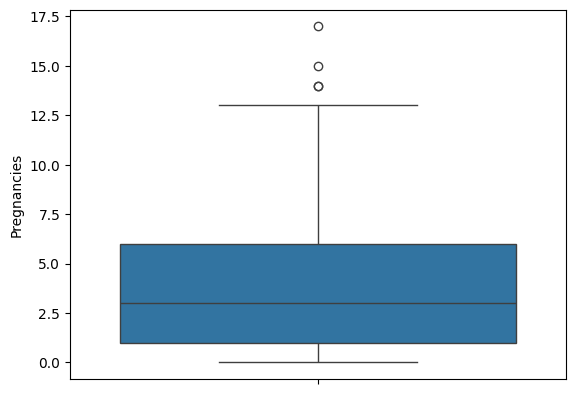

In [15]:
sns.boxplot(data.Pregnancies)

<Axes: xlabel='Pregnancies', ylabel='count'>

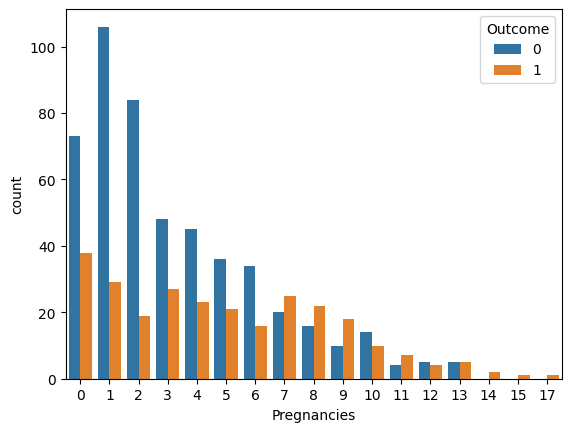

In [16]:
#sns.countplot(x=data.Pregnancies)
sns.countplot(x=data.Pregnancies,hue=data.Outcome)
#Insights: Count of 0-2 pregnancies is maximum, which means, about 40% ladies have 0-2 pregnancies as per the data given
#Insights: The chances of a non pregnant having a diabetes is 33%, 
#The data shows that the chances of women with 1 pregnancy getting diabetic is about 25%
#The data shows that the chances of women with 2 pregnancis getting diabetic is about 17%
#The data shows that People with more pregnancies (>13) have a higher risk of diabetes
#People with higher pregnancies(>7) are more than 50% probable to be diabetic

<Axes: xlabel='Pregnancies', ylabel='Count'>

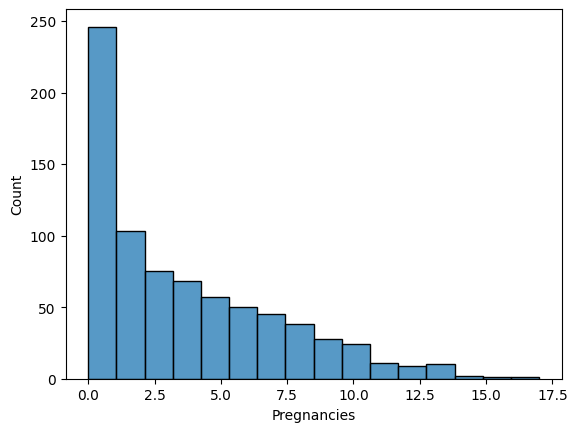

In [17]:
sns.histplot(data.Pregnancies)

<Axes: xlabel='Glucose', ylabel='Count'>

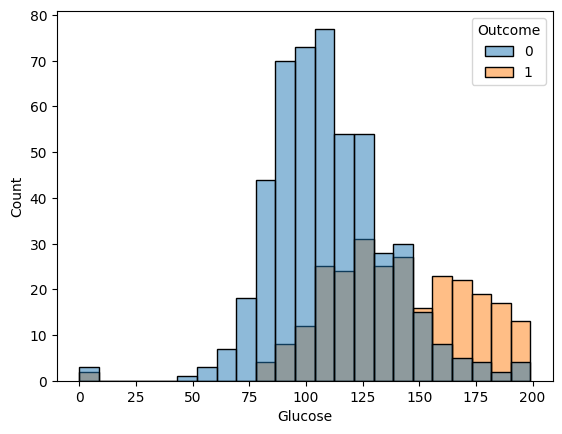

In [18]:
#sns.histplot(x=data.Glucose)
sns.histplot(x=data.Glucose,hue=data.Outcome)

In [19]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

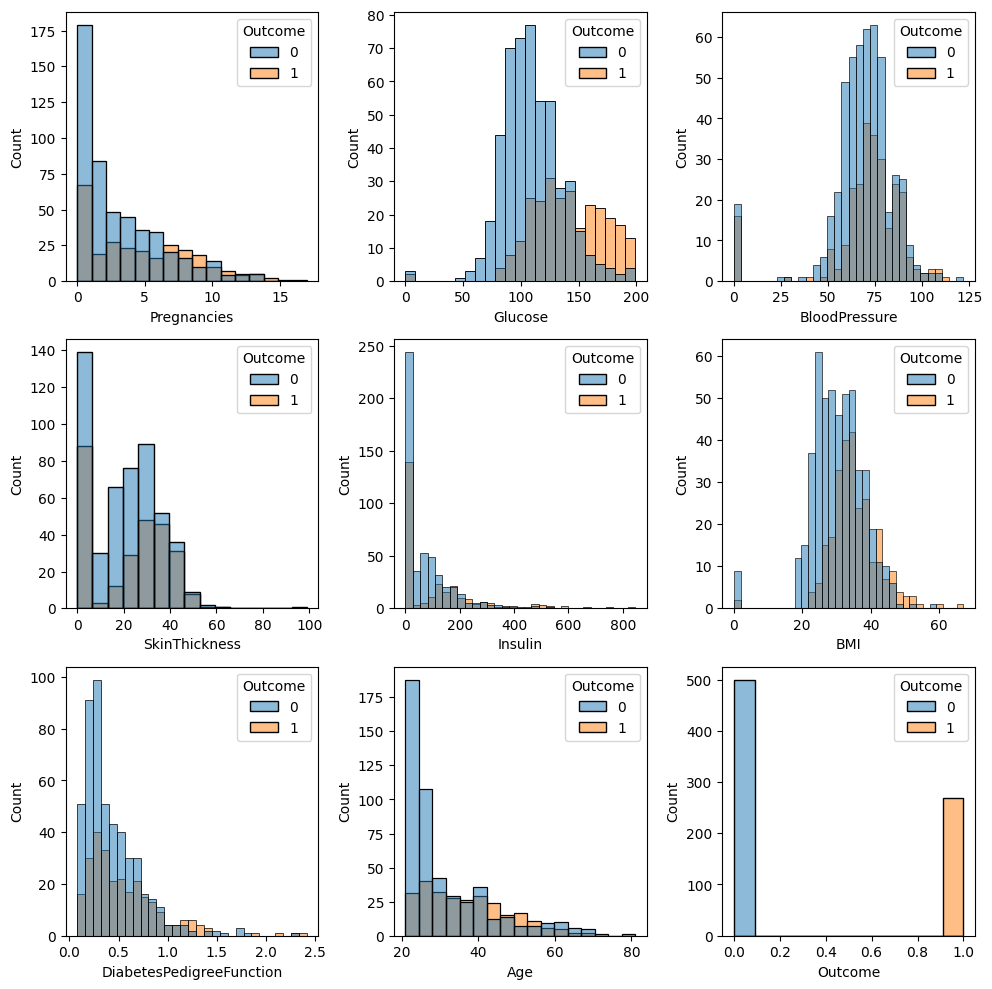

In [20]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in data:
    plt.subplot(3,3,plotnumber)
    #sns.histplot(x = data[i])
    sns.histplot(x = data[i],hue=data.Outcome)
    plotnumber += 1
plt.tight_layout()

### Insights
- Glucose: Most people seem to have glucose levels between 90-130 with entire range varying from 70-200, though we happen to have instances of 50-70 too
- BloodPressure: Most people seem to have bloodpressure between 70-80 with entire range varying from 50-110, though we happen to have instances of 25-50 and 110-120 too
- SkinThickness: Most people seem to have skinthickness between 0-7 with entire range varying from 0-57, though we happen to have instances of 57-65
- Insulin: 
- BMI: 
- DiabetesPedigreeFunction: 
- Age
- Using hue command, we realise that increase in glucose, bmi, blood pressure, the chances of diabetes is more. The rest features may not be significantly affecting the chances of diabetes

### Data Preprocessing

In [21]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
data.loc[data['Glucose']==0,'Glucose'] = np.median(data.Glucose)

In [23]:
data.loc[data['Glucose']==0,'Glucose']

Series([], Name: Glucose, dtype: int64)

In [24]:
data.SkinThickness.unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [25]:
data.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [26]:
data.Insulin.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [27]:
data.loc[data['BloodPressure']==0,'BloodPressure'] = np.median(data.BloodPressure)
data.loc[data['SkinThickness']==0,'SkinThickness'] = np.median(data.SkinThickness)
data.loc[data['Insulin']==0,'Insulin'] = int(np.median(data.Insulin))
data.loc[data['BMI']==0,'BMI'] = np.median(data.BMI)
#data.loc[data['Insulin']>500,'Insulin'] = np.median(data.Insulin)
#data.loc[data['Insulin']>350,'Insulin'] = 350

In [28]:
#Blood pressure less than 40 is not possible in reality. So, i'm setting those values to 40, to indicate that they are on the lower side of BP
data.loc[data.BloodPressure<40,'BloodPressure']=40

In [29]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.207882,0.032568,-0.056022,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218003,0.172143,0.357146,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.207882,0.218003,1.000000,0.150971,-0.030579,0.288693,-0.002866,0.326583,0.167178
SkinThickness,0.032568,0.172143,0.150971,1.000000,0.238321,0.546951,0.142977,0.054514,0.189065
Insulin,-0.056022,0.357146,-0.030579,0.238321,1.000000,0.188976,0.178173,-0.015892,0.148152
BMI,0.021546,0.231400,0.288693,0.546951,0.188976,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002866,0.142977,0.178173,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.326583,0.054514,-0.015892,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.167178,0.189065,0.148152,0.312249,0.173844,0.238356,1.000000


<Axes: >

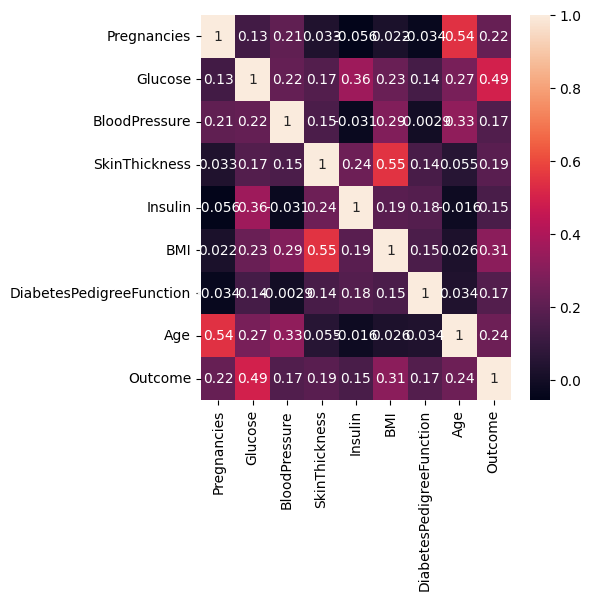

In [30]:
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(),annot=True)

### Modeling

In [31]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
#Feature Target separation
X = data.drop('Outcome',axis=1)
Y = data.Outcome

In [33]:
Y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [34]:
#Test-train split
from sklearn.model_selection import train_test_split
x_train_raw,x_test_raw,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X_scaled = scal.fit_transform(x_train_raw)

In [36]:
X_scaled

array([[0.76470588, 0.5483871 , 0.3902439 , ..., 0.44376278, 0.20964987,
        0.38333333],
       [0.23529412, 0.5483871 , 0.56097561, ..., 0.34560327, 0.06532878,
        0.03333333],
       [0.17647059, 0.10967742, 0.51219512, ..., 0.33128834, 0.0704526 ,
        0.41666667],
       ...,
       [0.58823529, 0.36774194, 0.56097561, ..., 0.5603272 , 0.45175064,
        0.28333333],
       [0.        , 0.62580645, 0.3902439 , ..., 0.49488753, 0.05422716,
        0.13333333],
       [0.        , 0.52258065, 0.68292683, ..., 0.08793456, 0.07856533,
        0.        ]])

In [37]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
x_train = pd.DataFrame(data=X_scaled,columns = data.columns[:8])

In [39]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.764706,0.548387,0.390244,0.400000,0.019231,0.443763,0.209650,0.383333
1,0.235294,0.548387,0.560976,0.218182,0.307692,0.345603,0.065329,0.033333
2,0.176471,0.109677,0.512195,0.363636,0.019231,0.331288,0.070453,0.416667
3,0.117647,0.238710,0.390244,0.127273,0.074519,0.243354,0.200256,0.066667
4,0.000000,0.374194,0.426829,0.272727,0.019231,0.282209,0.210931,0.000000
...,...,...,...,...,...,...,...,...
571,0.294118,0.612903,0.292683,0.490909,0.151442,0.212679,0.142186,0.083333
572,0.058824,0.335484,1.000000,0.272727,0.019231,0.085890,0.055081,0.100000
573,0.588235,0.367742,0.560976,0.527273,0.019231,0.560327,0.451751,0.283333
574,0.000000,0.625806,0.390244,0.272727,0.019231,0.494888,0.054227,0.133333


In [40]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [41]:
X_test = scal.transform(x_test_raw)
x_test =pd.DataFrame(data=X_test,columns = data.columns[:8])
y_pred = LR.predict(x_test)

In [42]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
x1 = pd.DataFrame()
x1[0] = y_pred
x1[1] = y_test.values
x1[2] = y_pred-y_test.values
x1.rename(columns={0: "Y_pred"}, inplace=True)
x1.rename(columns={1: "Y_test"}, inplace=True)
x1.rename(columns={2: "Error"}, inplace=True)
x1

,Y_pred,Y_test,Error
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
187,0,0,0
188,1,1,0
189,0,0,0
190,0,1,-1


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [45]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

In [46]:
y_pred1= pd.DataFrame(y_pred,columns=['pred'])

In [47]:
y_pred1

,pred
0,0
1,0
2,0
3,0
4,0
...,...
187,0
188,1
189,0
190,0


In [48]:
pd.crosstab(y_pred1.pred,y_test)

Outcome,0,1
pred,,
0,18,12
1,14,4


In [49]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy:',acc)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Precision:',pr,'\nRecall:', re,'\nF1Score', f1, '\nConfusion Matrix\n', cm)
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy: 0.7395833333333334
Precision: 0.6557377049180327 
Recall: 0.5797101449275363 
F1Score 0.6153846153846154 
Confusion Matrix
 [[102  21]
 [ 29  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       123
           1       0.66      0.58      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.73      0.74      0.74       192



## Multi class classification:
- Since its hard to draw a single line to classify classes, we use a concept called, OVR (One Versus Rest)
- We create same number of models as number of classes.
- Each model will take a class, and seggregate it against the rest
- Eg, 3 classes, A,B,C. Model1 will draw a seggregation line with A vs Rest, similarly Model2 is B vs Rest, Model3 is C vs Rest. Each time a datapoint comes, we apply 3 models to calculate probability of the point to in class A, B, C. If P(A) = 0.2, P(B)=0.5, P(C)=0.3, we classify the point to be class B, coz that P is more

In [50]:
iris = pd.read_csv("Iris.csv")
iris.Species.value_counts()  #Value counts done to see the balance in data

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [51]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
x = iris.drop(['Id','Species'], axis=1)
y = iris.Species

In [53]:
xtrain_raw,xtest_raw,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 30)

In [54]:
# Model Creation  - Demonstrating multi class classification using logistic Regression
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
col = x.columns
x_new = scaler1.fit_transform(xtrain_raw)  #Scaling done so that the model normalises all data, else, some columns may be given more weigtages by model
xtrain = pd.DataFrame(data=x_new,columns = col)


In [55]:
xtrain

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.316107,-0.637408,0.151114,0.147098
1,1.682576,-0.185574,1.180320,0.545686
2,1.185678,0.266259,1.237498,1.475725
3,0.688780,-0.637408,1.065963,1.209999
4,-0.056567,2.073592,-1.449874,-1.314391
...,...,...,...,...
107,-0.429240,-1.766991,0.151114,0.147098
108,1.931025,-0.637408,1.351854,0.944274
109,1.061454,0.040342,1.065963,1.608587
110,-1.298811,-0.185574,-1.335517,-1.181529


In [56]:
x_new = scaler1.transform(xtest_raw)
xtest = pd.DataFrame(data=x_new,columns = col)

In [57]:
#print(xtrain,xtest,ytrain,ytest)
LR1 = LogisticRegression(multi_class='ovr')
LR1.fit(xtrain,ytrain)
ypred = LR1.predict(xtest)
x2 = pd.DataFrame()
x2[0] = ypred
x2[1] = ytest.values
x2.rename(columns={0: "Y_pred"}, inplace=True)
x2.rename(columns={1: "Y_test"}, inplace=True)
x2

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,Y_pred,Y_test
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-versicolor,Iris-versicolor
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-virginica,Iris-virginica


In [58]:
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred,average='weighted'))
print(recall_score(ytest,ypred,average='weighted'))
print(f1_score(ytest,ypred,average='weighted'))
print(confusion_matrix(ytest,ypred), pd.crosstab(ytest,ypred))
print(classification_report(ytest,ypred))

0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
[[12  0  0]
 [ 0 10  1]
 [ 0  1 14]] col_0            Iris-setosa  Iris-versicolor  Iris-virginica
Species                                                      
Iris-setosa               12                0               0
Iris-versicolor            0               10               1
Iris-virginica             0                1              14
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38

